In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 25
Xn = np.random.exponential(size=n)

In [3]:
X = np.sort(Xn)
print("Xn:", Xn, "\n\nВариационный ряд (упорядоченная выборка)\nX:",X)

Xn: [0.29348788 0.23847677 0.32780422 0.60283765 0.41228447 0.96504035
 0.06900536 3.63159983 2.07665736 0.07619584 0.74595057 1.57583086
 2.70716417 2.10255816 0.19922922 2.56720181 1.59998244 0.65240852
 0.20938506 0.72499267 0.47369578 0.20093836 0.244155   1.29815229
 0.86038662] 

Вариационный ряд (упорядоченная выборка)
X: [0.06900536 0.07619584 0.19922922 0.20093836 0.20938506 0.23847677
 0.244155   0.29348788 0.32780422 0.41228447 0.47369578 0.60283765
 0.65240852 0.72499267 0.74595057 0.86038662 0.96504035 1.29815229
 1.57583086 1.59998244 2.07665736 2.10255816 2.56720181 2.70716417
 3.63159983]


In [4]:
md = "Все числа в Xn" # FIXME

s = f'''Мода:\t\t{md}
Медиана: \t{X[n//2]}
Размах: \t{X.max()-X.min()}
К. ассиметрии: \t{(((X-X.mean())**3).sum()/n)/np.var(X)**(3/2)}
'''
print(s)
#print((X-X.mean()), (X-X.mean())**3, (X-X.mean())[0]**3)

Мода:		Все числа в Xn
Медиана: 	0.6524085160364949
Размах: 	3.562594470331325
К. ассиметрии: 	1.2071444732600136



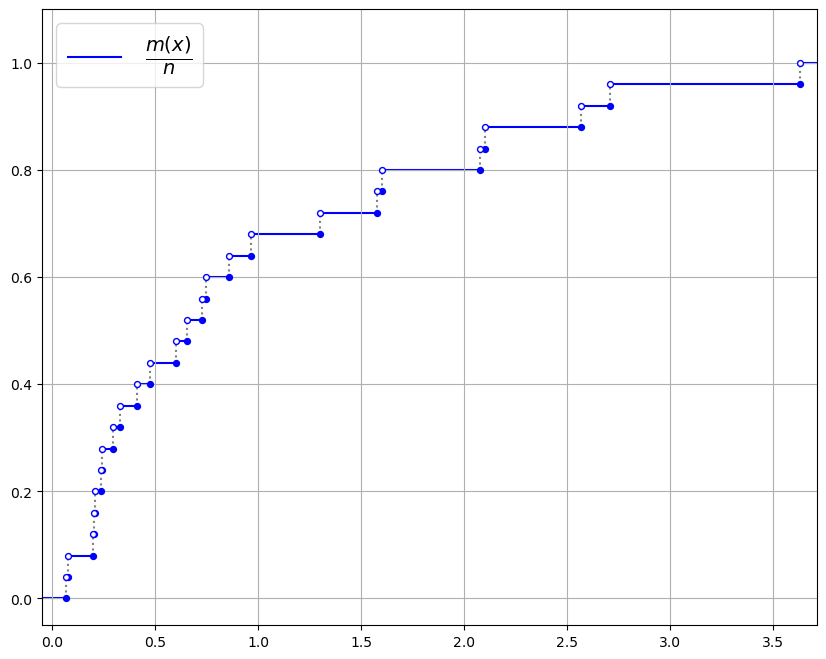

In [5]:
y=[(i+1)/n for i in range(n)]
Xtmp = np.zeros(len(y)+2)
Xtmp[1:n+1] = X
Xtmp[-1]=X[-1]+3*X.mean()
Xtmp[0]=-1
yn = np.insert(y, 0, 0)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_facecolor('white')

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
ax.hlines(y=yn, xmin=Xtmp[:-1], xmax=Xtmp[1:], color='blue', zorder=1)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
ax.vlines(x=Xtmp[1:-1], ymin=yn[:-1], ymax=yn[1:], color='gray',
          linestyle='dotted', zorder=1)

ax.scatter(Xtmp[1:-1], yn[:-1], color='blue', s=18, zorder=2)
ax.scatter(Xtmp[1:-1], y, color='white', s=18, zorder=2,
           edgecolor='blue')
ax.set_xlim(-0.05, X[-1]+2*X.mean()/n)
ax.grid(True)
ax.legend([r"$\frac{m(x)}{n}$"],loc=2,fontsize=20)
ax.set_ylim([-0.05, 1.1])
plt.show()

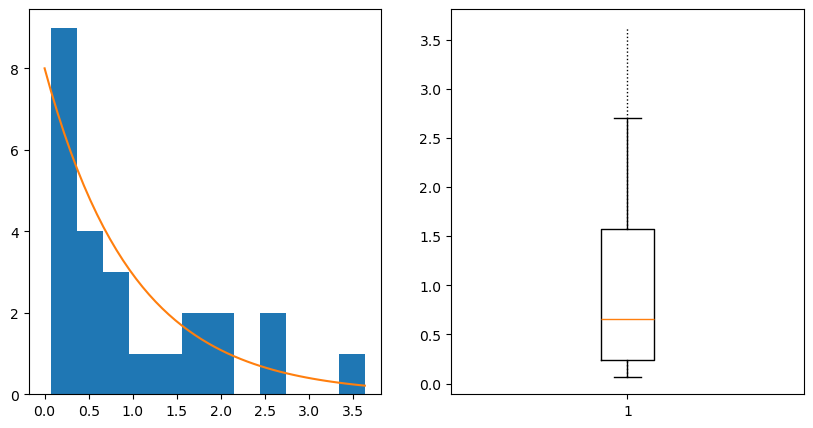

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
bds=int(X[-1]+1)*3
ax1.hist(X, bins=bds)
x = np.linspace(0, X[-1])
ax1.plot(x,np.exp(-x)*np.sum(X<X[-1]/bds))



ax2.plot([1,1],[X[3*n//4],X[-1]],linestyle='dotted',linewidth=1, color="black")
ax2.plot([1,1],[X[0],X[n//4]],linestyle='dotted',linewidth=1, color="black")
box=ax2.boxplot(X,showfliers=False)
#     q1-1.5Eps   q1   median  q2   q2+1.5Eps
#                  |-----:-----|
#  o      |--------|     :     |--------|    o
# min              |-----:-----|            max
#                  <----------->           
#                       Eps
plt.show()

In [7]:
!fortune

It would save me a lot of time if you just gave up and went mad now.
